<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
print(sklearn.__version__)

1.6.1


#사이킷런으로 시작하는 머신러닝



##02 첫번째 머신러닝 만들어보기- 붓꽃 품종 예측하기

###분류

* 대표적인 지도학습 방법의 하나
  *지도학습:학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다.
  * 즉 명확한 정답이 주어진 데이터를 먼저 학습

* 사용 모듈
  * sklearn.datasets:사이킷런 자체적으로 제공하는 데이터세트 생성
  * sklearn.tree: 트리 기반 ML알고리즘을 구현한 클래스 모임
  * sklearn.model_selection:학습 데이터와 검증 데이터 , 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
    * 하이퍼 파라미터: 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들의 통칭, 이를 통해 머신러닝 알고리즘의 성능 튜닝 가능

* 붓꽃 데이터: load_iris(), DecisionTreeClassifier 의사결정트리 알고리즘, train_test_split()함수로 학습, 테스트 데이터 분리

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
iris=load_iris()
iris_data=iris.data
iris_label=iris.target
print('iris target값', iris_label)
print('iris target명',iris.target_names)
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target값 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


학습데이터 테스트 데이터 분리
test size=0.2 > 20%가 테스트
randomstate를 지정하지 않으면 수행할 때마다 다른 데이터 만들 수 있음

In [4]:
X_train, X_test, y_train, y_test=train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)

의사결정 트리를 이용해 학습과 예측 수행

In [5]:
dt_clf=DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
pred=dt_clf.predict(X_test)

예측 성능 평가: 정확도 측정

In [7]:
from sklearn.metrics import accuracy_score
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9333


예측 프로세스 정리
1. 데이터 세트 분리
2. 모델 학습
3. 예측 수행
4. 평가

# 03 사이킷런의 기반 프레임워크 익히기

### Estimator 이해 및 fit(), predict()메서드

* Estimator class: 지도학습의 모든 알고리즘을 구현한 클래스-fit(),predict() 내부에서 구현
  * classifier class: 분류 알고리즘을 구현한 클래스
  * Regressor class: 회귀 알고리즘을 구현한 클래스

cross_val_score()와 같은 evaluation함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 Estimator를 인자로 받음

###사이킷런의 주요 모듈


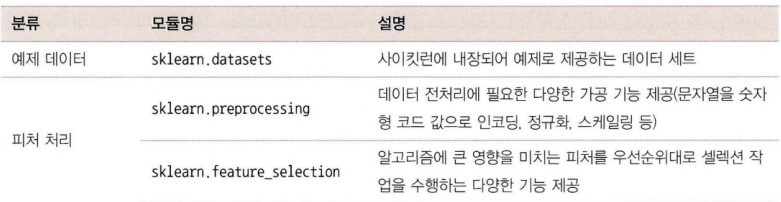

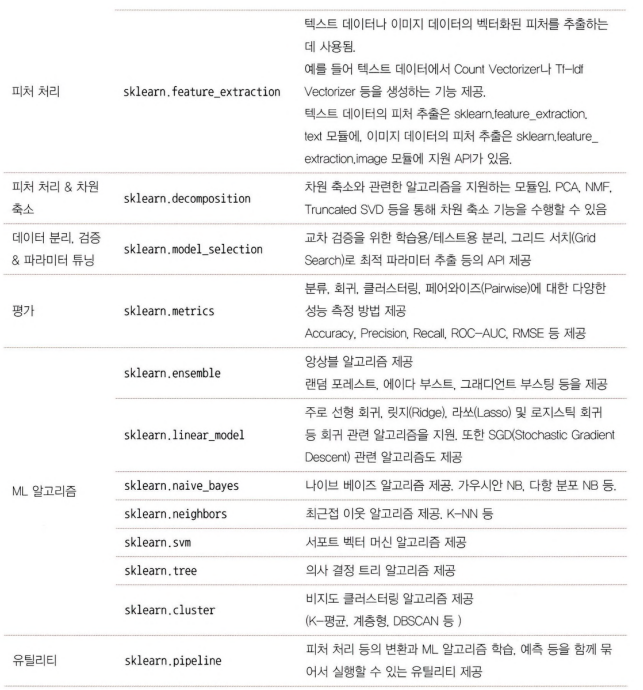

###내장된 예제 데이터 세트

datasets모듈에 있는 여러 API호출
* datasets.make_classifications(): 분류를 위한 데이터세트를 무작위 생성
* datasets.make_bolbs(): 클러스터링을 위한 데이터세트를 무작위 생성

개별 키가 가리키는 데이터세트 의미
* data:피처의 데이터 세트(ndarray)
* target: 분류 시 레이블 값, 회귀일 때 숫자 결괏값 데이터 세트(ndarray)
* target_names: 개별 레이블의 이름(list)
* feature_names: 피처의 이름(list)
* DESCR: 데이터 세트에 대한 설명과 각 피처의 설명

In [8]:
from sklearn.datasets import load_iris
iris_data=load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


Bunch클래스는 파이썬의 딕셔너리 자료형과 유사

데이터 세트에 내장된 대부분의 데이터 세트는 이와 같이 딕셔너리 형태의 값을 반환

In [9]:
keys=iris_data.keys()
print('붓꽃 데이터 세트의 키들: ',keys)

붓꽃 데이터 세트의 키들:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [10]:
print('\n feature_names의 type: ', type(iris_data.feature_names))
print(' feature_names의 shape',len(iris_data.feature_names))
print(iris_data.feature_names)


 feature_names의 type:  <class 'list'>
 feature_names의 shape 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print('\n target_names의 type: ', type(iris_data.target_names)) #list라면서 ndarray나옴;;
print(' target_names의 shape',len(iris_data.target_names))
print(iris_data.target_names)


 target_names의 type:  <class 'numpy.ndarray'>
 target_names의 shape 3
['setosa' 'versicolor' 'virginica']


In [12]:
print('\n data의 type: ',type(iris_data.data))
print('data의 shape: ',iris_data.data.shape)
print(iris_data['data'])


 data의 type:  <class 'numpy.ndarray'>
data의 shape:  (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3

In [13]:
print('\n target 의 type: ',type(iris_data.target))
print('target 의 shape: ',iris_data.target.shape)
print(iris_data.target)


 target 의 type:  <class 'numpy.ndarray'>
target 의 shape:  (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#04 Model Selection 모듈 소개

### 학습/ 테스트 데이터 세트 분리: train_test_split()

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#학습 데이터로만 학습하고 예측하면 생기는 문제점
iris=load_iris()
dt_clf=DecisionTreeClassifier()
train_data=iris.data
train_label=iris.target
dt_clf.fit(train_data,train_label)
pred=dt_clf.predict(train_data)
print('예측 정확도: ',accuracy_score(train_label,pred))


예측 정확도:  1.0


train_test_split()
* test_sizeL전체 데이터에서 테스트 데이터 세트 크기
* train_size:전체 데이터에서 학습용 데이터 세트 크기(잘 사용x)
* shuffle: 데이터를 분리하기 전에 데이터를 미리 섞을지 결정/디폴트는 True/데이터를 분산시켜 좀 더 효율적인 세트 만듦
* random_state:호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
* train_test_split의 반환값은 튜플 형태

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#학습 데이터로만 학습하고 예측하면 생기는 문제점
iris=load_iris()
dt_clf=DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3,random_state=121)
train_data=iris.data
train_label=iris.target
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9556


데이터가 많지 않아 예측 성능 판단하기 적절x

###교차검증

해당 테스트 데이터에만 과적합되는 문제점을 개선

별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행

학습, 검증, 테스트 데이터 세트로 나눔

1. k폴드 교차 검증
k개의 데이터 폴드 세트를 만들어 k번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

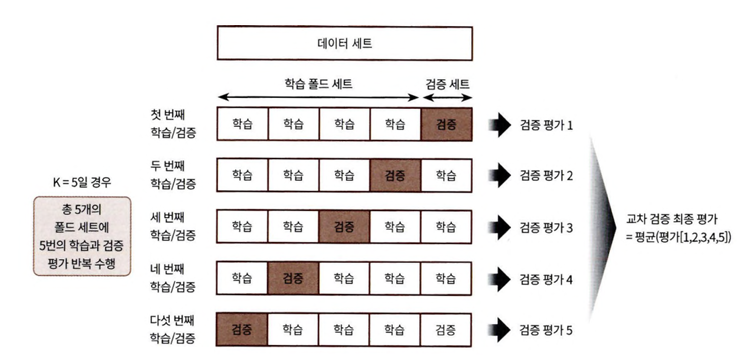

In [17]:
#k=5
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

kfold=KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기: ',features.shape[0])


붓꽃 데이터 세트 크기:  150


데이터 개수가 150개이므로 120개의 학습데이터, 30개의 검증 데이터로 분할

KFold객체의 split()를 호출해 5개의 폴드 세트 생성

In [20]:
n_iter=0

for train_index, test_index in kfold.split(features):
  X_train,X_test=features[train_index],features[test_index]
  y_train,y_test=label[train_index],label[test_index]
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  n_iter+=1
  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_size=X_train.shape[0]
  test_size=X_test.shape[0]
  print('\n{0}교차 검증 정확도:{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size,test_size))
  print('\n{0}검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)
print('\n##평균 검증 정확도:', np.mean(cv_accuracy))


1교차 검증 정확도:1.0, 학습 데이터 크기:120, 검증 데이터 크기:30

1검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2교차 검증 정확도:0.9667, 학습 데이터 크기:120, 검증 데이터 크기:30

2검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3교차 검증 정확도:0.8667, 학습 데이터 크기:120, 검증 데이터 크기:30

3검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4교차 검증 정확도:0.9333, 학습 데이터 크기:120, 검증 데이터 크기:30

4검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5교차 검증 정확도:0.7333, 학습 데이터 크기:120, 검증 데이터 크기:30

5검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

##평균 검증 정확도: 0.95


2. Stratified K폴드

불균형한 분포도를 가진 레이블 데이터 집합을 위한 k폴드 방식

원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배하여 원본 데이터 집합의 레이블 분포를 학습 및 테스트 데이터 세트에 분배

In [21]:
import pandas as pd
iris=load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

,count
label,
0,50
1,50
2,50


In [22]:
kfold=KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('##교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n',label_train.value_counts())
  print('검증 레이블 데이터 분포:\n',label_test.value_counts())

##교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
##교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
##교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


원본 데이터 분포 반영X

In [24]:
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('##교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n',label_train.value_counts())
  print('검증 레이블 데이터 분포:\n',label_test.value_counts())

##교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
##교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
##교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [27]:
dt_clf=DecisionTreeClassifier(random_state=156)
skfold=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skfold.split(features, label):
  X_train, X_test=features[train_index],features[test_index]
  y_train,y_test=label[train_index], label[test_index]
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  n_iter+=1
  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_size=X_train.shape[0]
  test_size=X_test.shape[0]
  print('\n{0}교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기{3}'
  .format(n_iter,accuracy,train_size,test_size))
  print('#{0}검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)
print('\n##교차 검증별 정확도:', np.round(cv_accuracy,4))
print('##평균 검증 정확도:',  np.round(np.mean(cv_accuracy),4))


1교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기50
#1검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기50
#2검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기50
#3검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

##교차 검증별 정확도: [0.98 0.94 0.98]
##평균 검증 정확도: 0.9667


3. 교차 검증을 보다 간편하게-cross_val_score()

폴드 세트 설정, for루프에서 반복으로 학습 및 테스트 데이터 인덱스 추출하고 반복적으로 학습과 예측을 수행하는 과정을 한꺼번에 수행해주는 API

 cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,
pre_dispatch='2*n_jobs')

* X: 피처 데이터 세트
* y:레이블 데이터 세트
* scoring: 예측 성능 평가 지표
* cv: 교차 검증 폴드 수
* 수행 후 반환값은 scoring파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)
data=iris_data.data
label=iris_data.target
scores=cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)
print('교차 검증별 정확도',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도 [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


cross_validate()는 여러개의 평가 지표 반환 가능

4. GridSearchCV-교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에

ex)max_depth파리미터 3개, min_samples_split파라미터 2개인 경우 모든 조합 즉 6개의 조합을 cv=3이라면 3*6=18번 만큼 학습 평가

주요 파라미터
* estimator
* param_grid: key+리스트 값을 가지는 딕셔너리가 주어짐, 파라미터 명과 사용될 여러 파라미터값을 지정
* scoring: 에측 성능 평가 방법
* cv: 분할되는 학습/테스트 세트의 개수 지정
* refit: 디폴트가 True이며 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator객체를 해당 하이퍼 파리미터로 재학습시킴

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
iris_data=load_iris()
X_train,X_test,y_train,y_test= train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=121)
dtree=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [31]:
import pandas as pd

grid_dtree=GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True)
grid_dtree.fit(X_train,y_train)

scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0


In [32]:
print('GridSearchCV 최적 파라미터: ',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.975000


In [34]:
estimator=grid_dtree.best_estimator_
pred=estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도:0.9667
